In [1]:
# 1. Necessary packages for Data Analysis
# !pip install pandas
# pip install matplotlib
# pip install seaborn
# 2. To Read excel file 
# pip install openpyxl

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To check any sources in this directory
import os
os.listdir('.')

['Analyst Grap Diver.ipynb',
 'Copy of casestudy_dataset_mkpbi_analyst.xlsx',
 '~$Copy of casestudy_dataset_mkpbi_analyst.xlsx']

# 1. Overviews of Dataset

In [4]:
# Load Dataset
df = pd.read_excel('Copy of casestudy_dataset_mkpbi_analyst.xlsx')

### Checking Dataset 

In [5]:
df.isnull().sum()

hour_local              0
pickup_area             0
dropoff_area            0
booking_state           0
driver_incentive_khr    0
trip_distance_km        0
trip_time_mins          0
eta_mins                0
ignored_drivers         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['hour_local', 'pickup_area', 'dropoff_area', 'booking_state',
       'driver_incentive_khr', 'trip_distance_km', 'trip_time_mins',
       'eta_mins', 'ignored_drivers'],
      dtype='object')

### Key Statistics

In [8]:
df.describe()

,hour_local,driver_incentive_khr,trip_distance_km,trip_time_mins,eta_mins,ignored_drivers
count,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000,9894.000000
mean,16.684657,578.183748,3.612268,12.345440,2.049284,4.546392
std,1.036781,233.306207,2.087999,6.789557,1.762848,0.617004
min,15.000000,300.000000,1.001000,3.066667,0.000000,0.000000
25%,16.000000,400.000000,1.957250,6.983333,0.683333,4.000000
50%,17.000000,510.000000,3.049000,10.600000,1.533333,5.000000
75%,18.000000,710.000000,4.784417,16.166667,2.933333,5.000000
max,18.000000,2410.000000,9.998000,36.000000,9.366667,6.000000


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>hour_local</th>
      <th>driver_incentive_khr</th>
      <th>trip_distance_km</th>
      <th>trip_time_mins</th>
      <th>eta_mins</th>
      <th>ignored_drivers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>9894.000000</td>
      <td>9894.000000</td>
      <td>9894.000000</td>
      <td>9894.000000</td>
      <td>9894.000000</td>
      <td>9894.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>16.684657</td>
      <td>578.183748</td>
      <td>3.612268</td>
      <td>12.345440</td>
      <td>2.049284</td>
      <td>4.546392</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1.036781</td>
      <td>233.306207</td>
      <td>2.087999</td>
      <td>6.789557</td>
      <td>1.762848</td>
      <td>0.617004</td>
    </tr>
    <tr>
      <th>min</th>
      <td>15.000000</td>
      <td>300.000000</td>
      <td>1.001000</td>
      <td>3.066667</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>16.000000</td>
      <td>400.000000</td>
      <td>1.957250</td>
      <td>6.983333</td>
      <td>0.683333</td>
      <td>4.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>17.000000</td>
      <td>510.000000</td>
      <td>3.049000</td>
      <td>10.600000</td>
      <td>1.533333</td>
      <td>5.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>18.000000</td>
      <td>710.000000</td>
      <td>4.784417</td>
      <td>16.166667</td>
      <td>2.933333</td>
      <td>5.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>18.000000</td>
      <td>2410.000000</td>
      <td>9.998000</td>
      <td>36.000000</td>
      <td>9.366667</td>
      <td>6.000000</td>
    </tr>
  </tbody>
</table>
</div>

In [9]:
# To check number columns and row (row,col)
df.shape

(9894, 9)

- So the Dataset above has such as columns: 
``` 'hour_local', 
'pickup_area',
'dropoff_area', 
'booking_state',
'driver_incentive_khr',
'trip_distance_km', 
'trip_time_mins',
'eta_mins', 
'ignored_drivers' 

```
### Ky statistics
- Key findings 
       
1. Total Bookings: 9894
2. Average Trip Distance: 3.61 km
3. Average Trip Time: 12.35 mins
4. Average Driver Incentive: 578.18 KHR
5. Average ETA: 2.05 mins
6. Average Ignored Drivers: 4.55

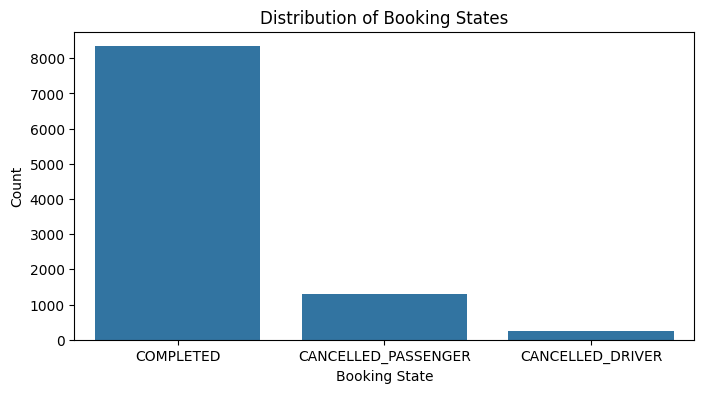

In [10]:
# Distribution of booking states
booking_state_counts = df['booking_state'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=booking_state_counts.index, y=booking_state_counts.values)
plt.title('Distribution of Booking States')
plt.xlabel('Booking State')
plt.ylabel('Count')
plt.show()

# 2. Factors Impacting Number of Ignored Drivers

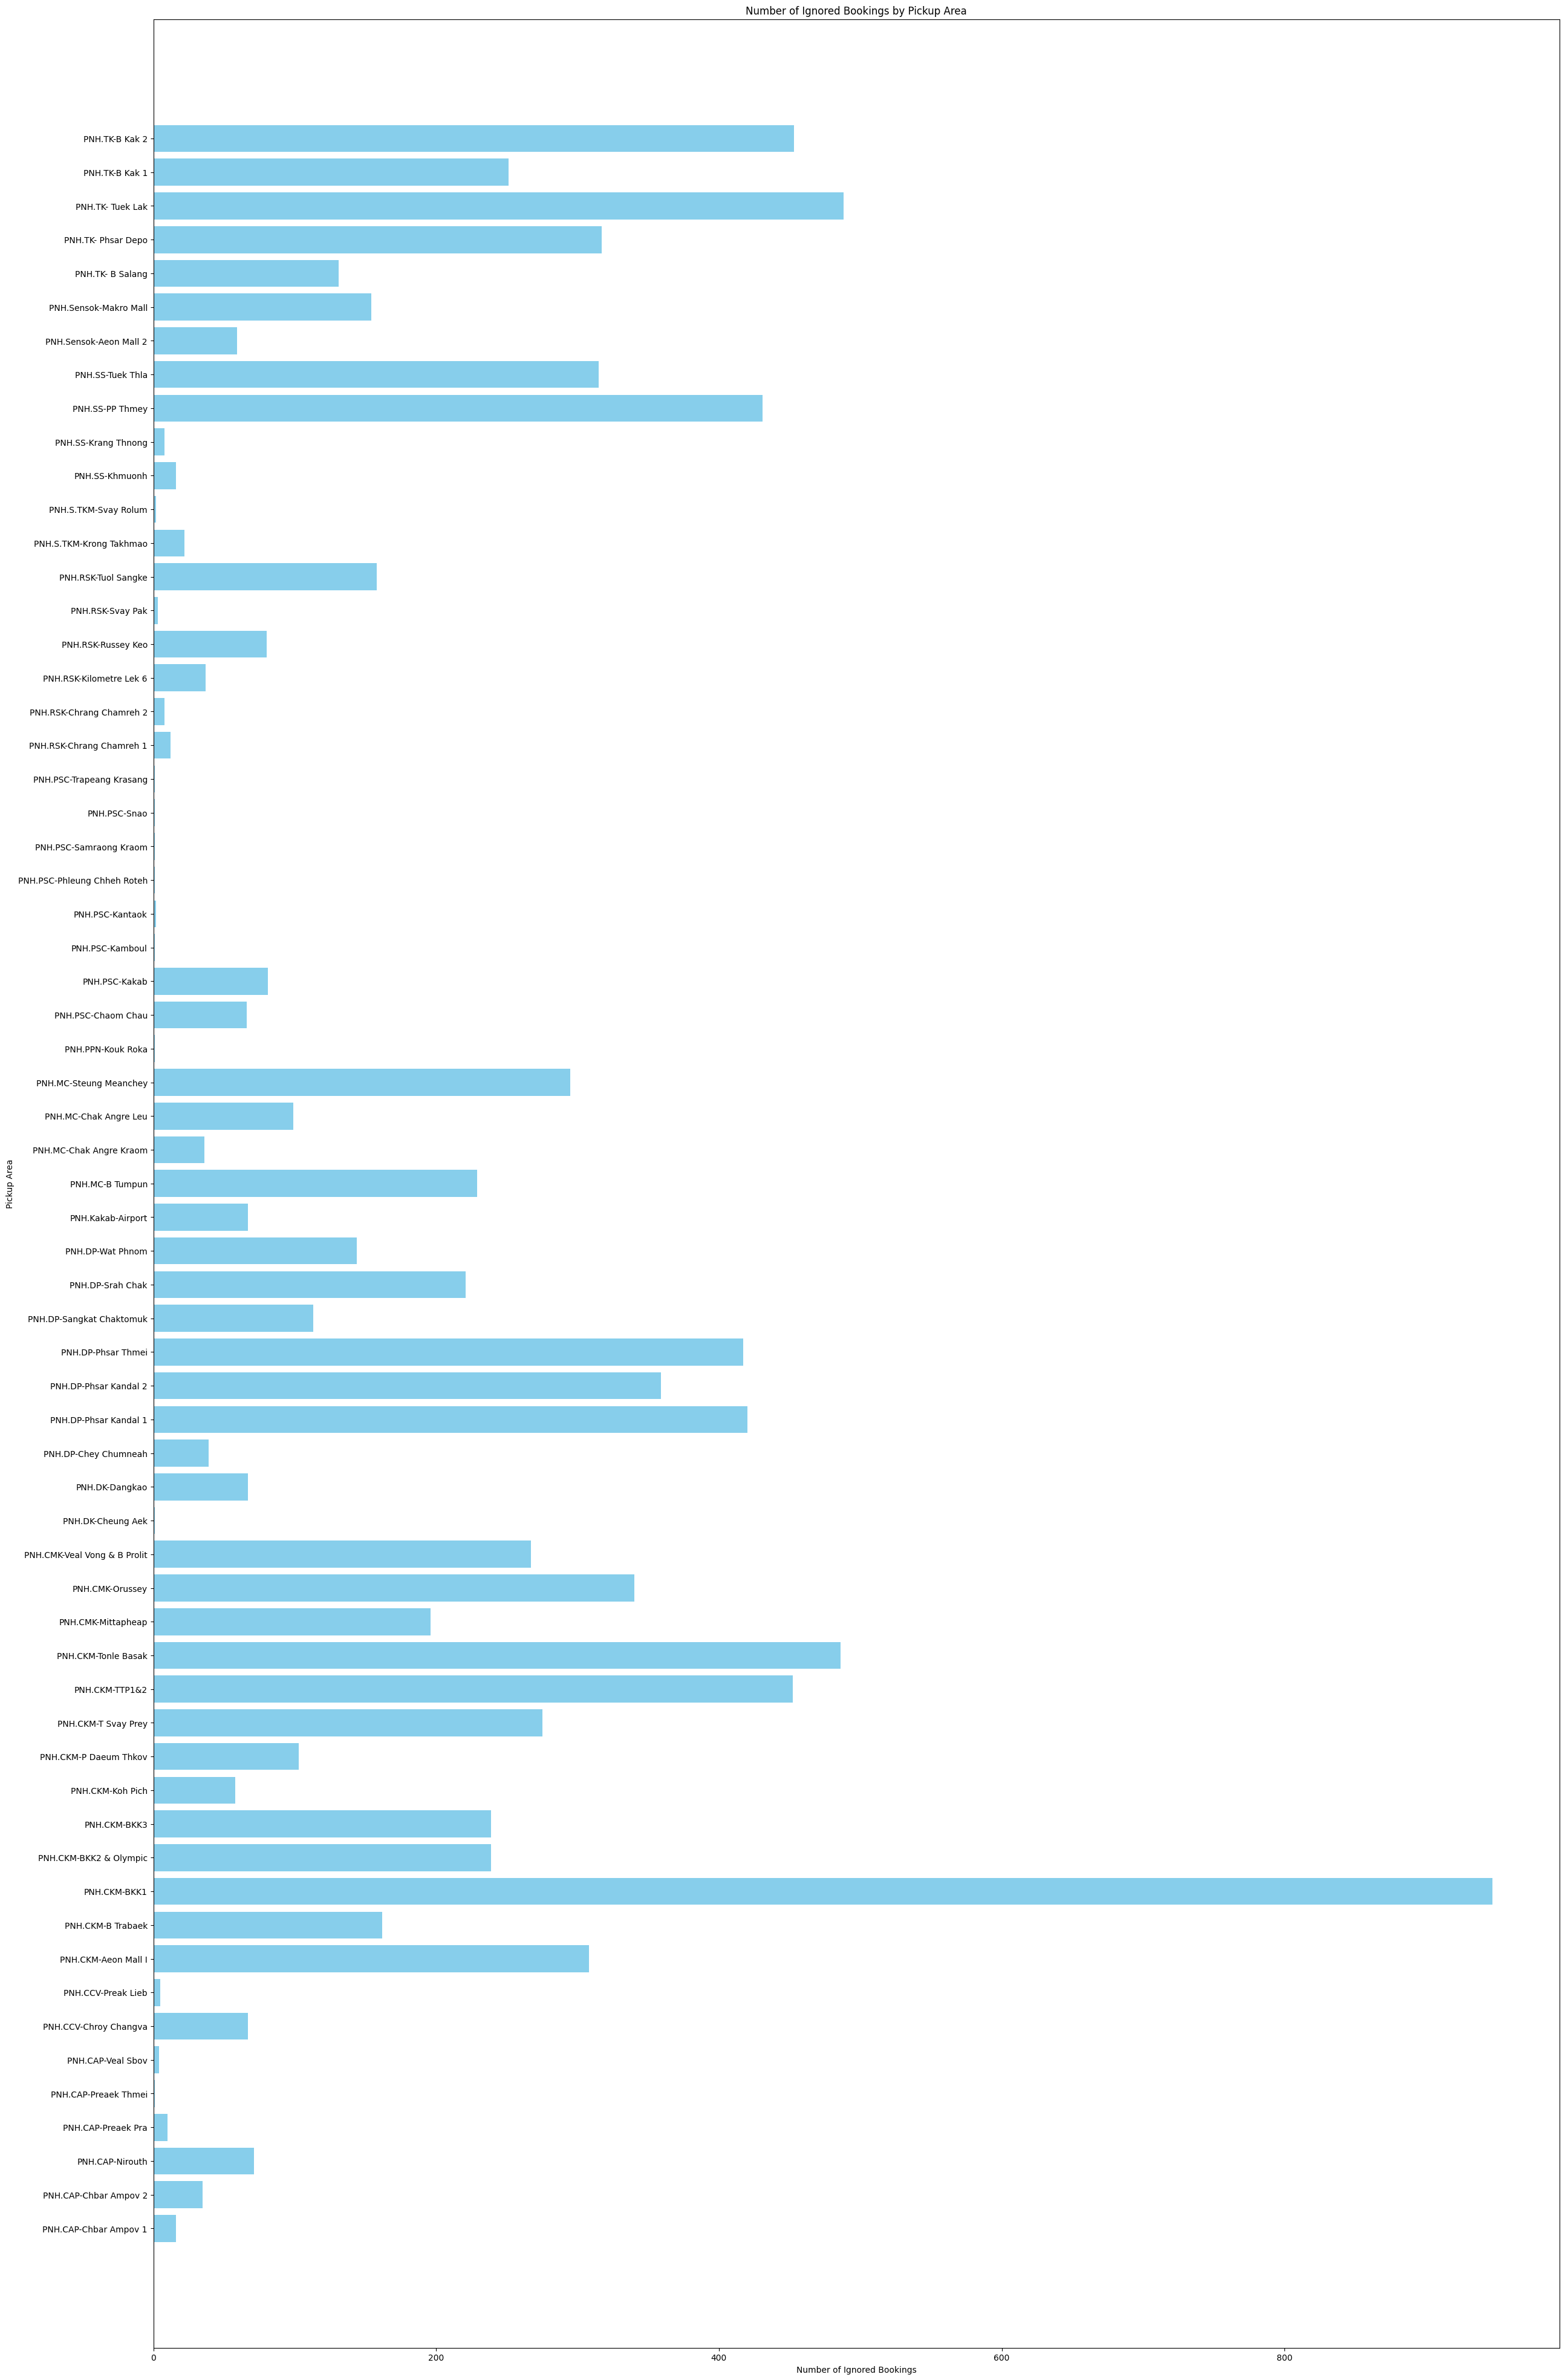

In [11]:
# Create a count of ignored bookings by pickup area
ignored_by_area = df[df['ignored_drivers'] > 0].groupby('pickup_area').size().reset_index(name='ignored_count')

# Plot bar chart for ignored bookings
plt.figure(figsize=(30, 50))
plt.barh(ignored_by_area['pickup_area'], ignored_by_area['ignored_count'], color='skyblue')
plt.xlabel('Number of Ignored Bookings')
plt.ylabel('Pickup Area')
plt.title('Number of Ignored Bookings by Pickup Area')
plt.show()

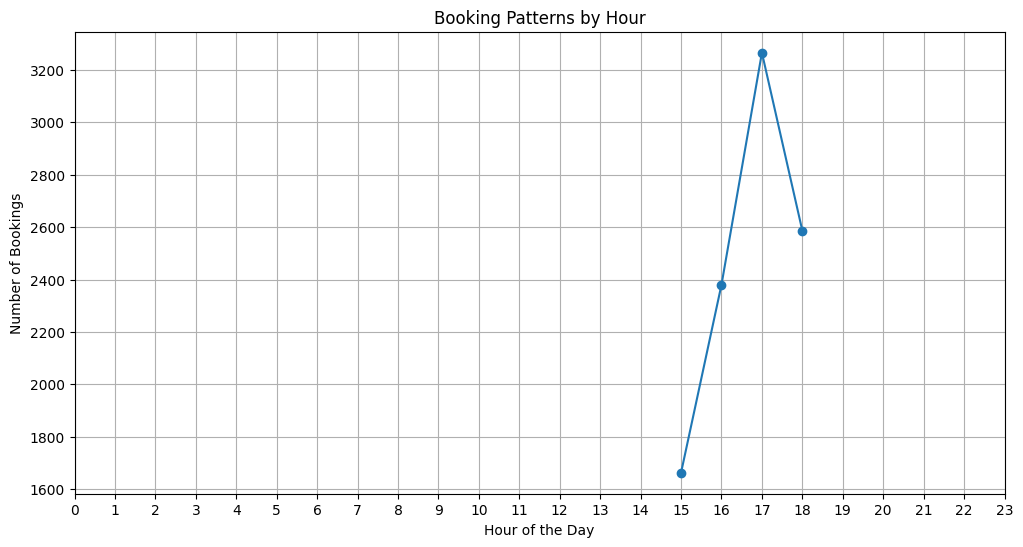

In [12]:
# Group by hour_local to get booking patterns
hourly_bookings = df.groupby('hour_local').size()

# Plot time series graph
plt.figure(figsize=(12, 6))
plt.plot(hourly_bookings.index, hourly_bookings.values, marker='o')
plt.title('Booking Patterns by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bookings')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [13]:

import statsmodels.api as sm

# Building a linear regression model to understand the influence of various factors on 'ignored_drivers'
# Choosing explanatory variables based on the hypotheses
X = df[['hour_local', 'trip_distance_km', 'driver_incentive_khr', 'eta_mins']]
y = df['ignored_drivers']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ignored_drivers   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     2818.
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        18:31:54   Log-Likelihood:                -5497.4
No. Observations:                9894   AIC:                         1.100e+04
Df Residuals:                    9889   BIC:                         1.104e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.7996      0.074     64.675      0.000       4.654       4.945
hour_local              -0.0101      0.005     -2.215      0.027      -0.019      -0.001
trip_distance_km         0.5470      0.006     84.810      0.000       0.534       0.560
driver_incentive_khr    -0.0036   5.79e-05    -61.566      0.000      -0.004      -0.003
eta_mins              -9.52e-05      0.003     -0.035      0.972      -0.005       0.005
==============================================================================
Omnibus:                      298.022   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.876
Skew:                          -0.270   Prob(JB):                    4.68e-109
Kurtosis:                       3.958   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Key Findings:

## 1. Model Performance:

R-squared: 0.533: This indicates that approximately 53.3% of the variance in the number of ignored drivers is explained by the model. This is a reasonable proportion, suggesting the model has a moderate explanatory power.
Adj. R-squared: 0.532: This adjusted value accounts for the number of predictors in the model, confirming that the model is fitting the data well with the given predictors.

## 2. Coefficients and Significance:

#### Constant (Intercept): 4.7996 (p < 0.000)
- Interpretation: When all predictor variables are zero, the baseline number of ignored drivers is approximately 4.8. This is highly significant.
#### hour_local: -0.0101 (p = 0.027)
- Interpretation: For each additional hour later in the day, the number of ignored drivers decreases by 0.0101, holding other factors constant. This is a small but statistically significant effect.
#### trip_distance_km: 0.5470 (p < 0.000)
- Interpretation: For each additional kilometer in trip distance, the number of ignored drivers increases by 0.547. This is a large and highly significant effect, indicating that longer trips are more likely to be ignored by drivers.
#### driver_incentive_khr: -0.0036 (p < 0.000)
- Interpretation: For each additional KHR in driver incentive, the number of ignored drivers decreases by 0.0036. This is a small but highly significant effect, showing that higher incentives reduce the number of ignored drivers.
#### eta_mins: -9.52e-05 (p = 0.972)
- Interpretation: The estimated time of arrival (ETA) to the pickup location does not have a statistically significant impact on the number of ignored drivers. Its p-value is very high, indicating no significant effect.

## Interpretation and Recommendations

#### Time of Day

Although the effect of the time of day (`hour_local`) on ignored drivers is statistically significant, it is quite small in magnitude. However, it still suggests that bookings made later in the day tend to be slightly less ignored.

#### Trip Distance

The trip distance (`trip_distance_km`) has a strong positive impact on the number of ignored drivers. Longer trips are significantly more likely to be ignored. This could be due to drivers preferring shorter, quicker trips over longer ones that might take more time and potentially involve more traffic or other challenges.

#### Driver Incentive

Driver incentives (`driver_incentive_khr`) play a crucial role in reducing ignored bookings. Increasing incentives, even slightly, significantly reduces the likelihood of drivers ignoring a booking. This indicates that financial incentives are a strong motivator for driver acceptance.

#### ETA to Pickup

The estimated time of arrival (`eta_mins`) does not significantly affect the number of ignored drivers. This suggests that drivers may not consider the ETA as an important factor when deciding whether to accept or ignore a booking.

## Recommendations

#### Dynamic Incentives

Implement dynamic incentive schemes where incentives are adjusted based on the trip distance and time of day. For longer trips, offer higher incentives to encourage acceptance.

#### Focus on Short Trips

Promote and possibly provide additional incentives for shorter trips during peak hours to ensure better driver availability and reduced ignored bookings.

#### Further Research on Time of Day

Investigate the underlying reasons why the time of day has a small effect on driver behavior. Consider external factors like traffic patterns, driver shift changes, or typical demand surges.

#### Optimize Dispatch Algorithm

Since ETA does not significantly impact ignored drivers, the dispatch algorithm can prioritize other factors such as trip distance and incentives over minimizing ETA, potentially leading to more efficient driver allocation.


# 3. Factors Leading to Booking Cancellations

Optimization terminated successfully.
         Current function value: 0.406870
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          booking_state   No. Observations:                 9894
Model:                          Logit   Df Residuals:                     9889
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 May 2024   Pseudo R-squ.:                 0.06527
Time:                        18:31:54   Log-Likelihood:                -4025.6
converged:                       True   LL-Null:                       -4306.7
Covariance Type:            nonrobust   LLR p-value:                2.378e-120
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -2.8499      0.533     -5.346      0.000      -3.895      -1.805

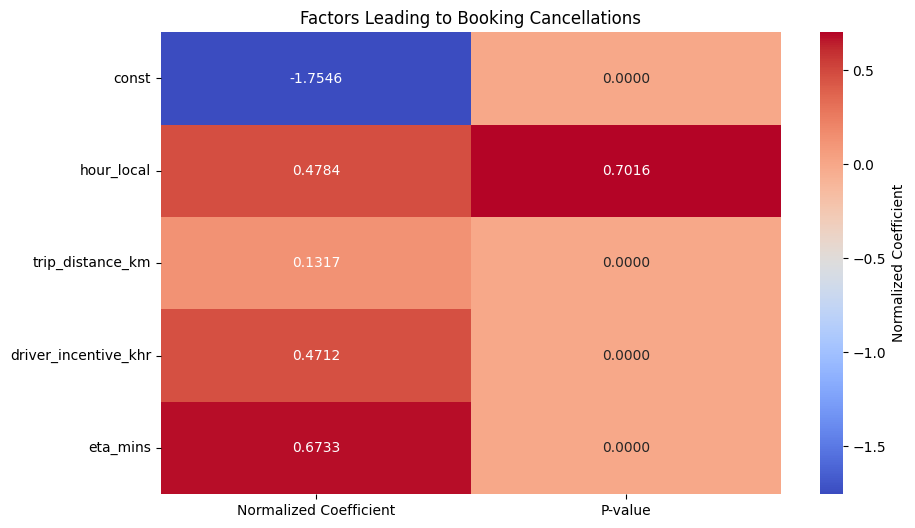

In [14]:
# Convert booking_state to a binary outcome: 1 if cancelled (either by passenger or driver), 0 if completed
df['booking_state'] = df['booking_state'].apply(lambda x: 1 if 'CANCELLED' in x else 0)

# Selecting relevant features based on the hypotheses
X = df[['hour_local', 'trip_distance_km', 'driver_incentive_khr', 'eta_mins']]
y = df['booking_state']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Summary of the model
print(logit_model.summary())

# Extract coefficients and p-values
coef = logit_model.params
p_values = logit_model.pvalues

# Creating a DataFrame for coefficients and p-values
result_df = pd.DataFrame({'Coefficient': coef, 'P-value': p_values})

# Normalize coefficients for better visualization in heatmap
result_df['Normalized Coefficient'] = (result_df['Coefficient'] - result_df['Coefficient'].mean()) / result_df['Coefficient'].std()

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(result_df[['Normalized Coefficient', 'P-value']], annot=True, cmap='coolwarm', cbar_kws={'label': 'Normalized Coefficient'}, fmt='.4f')
plt.title('Factors Leading to Booking Cancellations')
plt.show()

## Interpretation of Logit Regression Results:
### 1. Model Fit and Summary Statistics:

- Log-Likelihood: -4025.6 (Lower values indicate a better fit).
- Pseudo R-squared: 0.06527 (Indicates the proportion of variance explained by the model; values closer to 1 indicate a better fit).
- LL-Null vs. LL-Model: The significant LLR p-value (2.378e-120) indicates that the model with predictors fits significantly better than a model with no predictors.

2. Coefficients and Significance:

- const: -2.8499 (p-value < 0.001) - A significant intercept implies a base log-odds for booking cancellations when all predictors are zero.
- hour_local: 0.0124 (p-value = 0.702) - The hour of the day does not significantly impact the likelihood of booking cancellations.
- trip_distance_km: -0.4320 (p-value < 0.001) - A negative and significant coefficient implies that longer trips are less likely to be canceled. For each additional kilometer, the log-odds of cancellation decrease by 0.432.
- driver_incentive_khr: 0.0032 (p-value < 0.001) - A positive and significant coefficient indicates that higher driver incentives increase the likelihood of booking cancellations. For each additional KHR in incentive, the log-odds of cancellation increase by 0.0032.
- eta_mins: 0.2622 (p-value < 0.001) - A positive and significant coefficient implies that a higher estimated time of arrival (ETA) increases the likelihood of cancellations. For each additional minute in ETA, the log-odds of cancellation increase by 0.2622.

## Key Findings:
### 1. Hour of the Day:

- The hour of the booking (hour_local) is not a significant factor in determining booking cancellations.
### 2. Trip Distance:

- Longer trip distances significantly decrease the likelihood of booking cancellations. Passengers are less likely to cancel longer trips.
### 3. Driver Incentive:

- Higher driver incentives are associated with a higher likelihood of booking cancellations. This may indicate that high incentives are often offered for less desirable trips, which are more likely to be canceled.
### 4. ETA (Estimated Time of Arrival):

- Higher ETA significantly increases the likelihood of cancellations. Passengers are more likely to cancel if the driver's arrival time is longer.

## Recommendations:
### 1. Focus on Reducing ETA:

- Implement strategies to reduce ETA, such as optimizing driver allocation and improving traffic prediction models, to decrease the likelihood of cancellations.
### 2. Reevaluate Incentive Structures:

- Investigate why higher incentives are associated with more cancellations. Adjust incentive structures to ensure they are effective and not just compensating for undesirable trips.
### 3. Encourage Longer Trips:

- Promote longer trips as they have a lower likelihood of cancellation. Consider offering discounts or promotions for longer-distance bookings.
### 4. Time of Day Analysis:

- Even though hour_local is not significant in this analysis, further exploration might be necessary to see if there are specific peak hours with higher cancellation rates.

# 4. Business Strategies Based on Findings

### 1. Reduce Ignored Bookings:

#### Dynamic Incentives:

- Rationale: Higher ETAs and specific times of the day can lead to more ignored bookings. By implementing dynamic incentives, drivers can be motivated to accept less appealing trips.
- Strategy: Develop an algorithm that adjusts driver incentives in real-time based on current demand, ETA, and time of day. For instance, trips with higher ETAs during peak hours can have increased incentives to make them more attractive to drivers.
#### Loyalty Points or Bonuses:

- Rationale: Encouraging drivers to accept trips that are frequently ignored can help reduce the number of ignored bookings.
- Strategy: Implement a loyalty program where drivers earn points for accepting trips that are typically ignored. These points can be redeemed for cash bonuses, fuel discounts, or other rewards. Additionally, offer bonuses for drivers who consistently accept these trips over a certain period.

### 2. Decrease Cancellations:

#### Minimum Fare Guarantees:

- Rationale: Passengers might cancel trips if they perceive the fare to be too high or the trip to be unprofitable.
- Strategy: Introduce a minimum fare guarantee for all trips to ensure that passengers are not disincentivized by perceived high costs. This can be particularly effective for shorter trips where the fare might seem disproportionate to the distance.
#### Enhanced Real-Time Communication:

- Rationale: Improving coordination and trust between drivers and passengers can reduce cancellations, particularly for trips with higher ETAs.
- Strategy: Enhance the communication features in the app to provide real-time updates on driver location, expected arrival time, and any delays. Features could include:

  - Real-time chat or call options between drivers and passengers.
  - Automated updates and notifications if the driver's ETA changes.
  - Visual tracking of the driver's route to the pickup location.

### Implementation Plan:
#### 1. Develop Dynamic Incentive Algorithms:

- Collaborate with data scientists and software developers to create algorithms that adjust incentives based on real-time data (ETA, time of day, and current demand).
- Test these algorithms in a controlled environment before a full-scale rollout.
#### 2. Launch Loyalty Program:

- Design the loyalty program, including how points are earned and what rewards are available.
- Promote the program to drivers through in-app notifications, emails, and training sessions.
### 3. Introduce Minimum Fare Guarantees:

- Set a minimum fare threshold and ensure it covers basic costs and driver compensation.
- Communicate this change to passengers to manage their expectations.
### 4. Enhance Communication Features:

- Upgrade the app to include real-time chat and call options.
- Develop automated systems for sending updates on ETA and delays.
- Ensure the app interface is user-friendly and provides clear information on the driver's route and expected arrival.

## Key Metrics for Success:

- Reduced Number of Ignored Bookings: Track the number of ignored bookings before and after implementing dynamic incentives and loyalty programs.
- Lower Cancellation Rates: Monitor the cancellation rates to see if they decrease following the introduction of minimum fare guarantees and improved communication features.
- Driver and Passenger Satisfaction: Conduct surveys to assess satisfaction levels among drivers and passengers regarding the new features and incentives.
- Operational Efficiency: Measure the overall efficiency of the service, including average wait times, trip completion rates, and driver acceptance rates.

By addressing the factors impacting ignored bookings and cancellations, these strategies aim to improve the overall efficiency and reliability of the GrabTukTuk service, benefiting both drivers and passengers.

# 5. Additional Data Suggestions
To further enhance the analysis and effectiveness of the proposed strategies, the following additional data sources and metrics can be considered:

## Driver Feedback
#### Rationale:
 Post-trip ratings and comments from drivers can provide qualitative insights into why certain trips are ignored or canceled.

- Implementation:
    - Collect and analyze post-trip feedback from drivers, focusing on reasons for rejecting or accepting bookings.
    - Use sentiment analysis on driver comments to identify common themes or specific issues.
    - Incorporate driver feedback into the dynamic incentive and loyalty program algorithms to address the most frequently mentioned concerns.
## Passenger History
#### Rationale:
 Understanding passenger behavior, particularly those with a history of frequent cancellations, can help identify patterns or problematic behaviors.

- Implementation:
    - Track the frequency and reasons for booking cancellations by individual passengers.
    - Segment passengers based on their cancellation behavior and tailor communication or incentives accordingly.
    - Implement a rating or flagging system for passengers who frequently cancel, and consider implementing penalties or restrictions for repeat offenders to discourage this behavior.
## Traffic and Weather Data
#### Rationale: 
Traffic congestion and weather conditions can significantly impact ETA and the likelihood of both ignored bookings and cancellations.

- Implementation:
    - Integrate real-time traffic data from sources such as Google Maps or local traffic authorities to refine ETA estimates.
    - Use historical traffic data to identify peak congestion times and adjust driver incentives accordingly.
    - Incorporate weather data to anticipate delays and adjust ETAs and pricing models dynamically. For example, higher incentives during bad weather conditions can make trips more attractive to drivers.
    - Develop predictive models that account for traffic and weather conditions to optimize driver routing and availability.
## Implementation Steps for Additional Data Integration
#### 1. Driver Feedback Integration:

- Develop a feedback collection mechanism in the app where drivers can rate and comment on trips.
- Analyze feedback data using text mining and sentiment analysis tools to extract actionable insights.
- Regularly update dynamic incentive algorithms based on driver feedback trends.
#### 2. Passenger History Analysis:

- Implement a system to track and analyze passenger cancellation patterns.
- Create targeted communication strategies for passengers with high cancellation rates, offering them incentives to complete bookings.
- Develop a fair penalty system for passengers who frequently cancel, such as reduced priority for future bookings.
#### 3. Traffic and Weather Data Integration:

- Partner with traffic data providers to access real-time and historical traffic information.
- Integrate weather APIs to gather current and forecasted weather conditions.
- Enhance the ETA calculation models to factor in traffic and weather data, providing more accurate estimates.
- Adjust dynamic pricing models to offer higher incentives during adverse traffic or weather conditions to ensure driver availability and passenger satisfaction.

## Monitoring and Evaluation

- KPIs for Additional Data Integration:
    - Driver Satisfaction Scores: Track changes in driver satisfaction before and after implementing feedback-driven changes.
    - Passenger Cancellation Rates: Monitor the impact of targeted strategies on passengers with high cancellation rates.
   -  ETA Accuracy: Measure improvements in ETA accuracy with the integration of traffic and weather data.
    - Trip Completion Rates: Evaluate the overall effect on trip completion rates and the incidence of ignored bookings and cancellations.
    
By leveraging additional data sources such as driver feedback, passenger history, and traffic and weather conditions, Grab can further optimize its operations, improve the user experience, and reduce the rates of ignored bookings and cancellations.








# 6. Further Insights and Recommendations
To further enhance the analysis and effectiveness of the strategies, here are additional insights and recommendations:

## Time Series Analysis
#### Rationale: 
Understanding the temporal patterns of booking behaviors can help in identifying peak and off-peak hours.

- Implementation:
    - Perform a time series analysis on booking data to identify peak hours of demand.
    - Analyze the correlation between peak hours and ignored bookings or cancellations.
    - Adjust dynamic incentives and driver deployment strategies according to peak and off-peak times to ensure optimal coverage and reduce ignored bookings.

## Geographic Segmentation
#### Rationale: 
Different areas may exhibit different booking behaviors and operational challenges.

- Implementation:
    - Segment the analysis by pickup and dropoff areas to identify geographic patterns.
    - Investigate areas with high rates of ignored bookings or cancellations to understand the underlying causes (e.g., traffic congestion, safety concerns, availability of alternative transportation).
    - Tailor strategies such as localized incentives, targeted driver outreach, and area-specific promotions based on the geographic analysis.
## Correlation Analysis with Operational Metrics
#### Rationale: 

Investigating the relationship between ignored drivers and other operational metrics can provide deeper insights into service efficiency.

- Implementation:
    - Analyze correlations between the number of ignored drivers and metrics such as average wait time, driver satisfaction, and trip completion rates.
    - Identify operational bottlenecks that contribute to ignored bookings and address them through process improvements and resource allocation.
    - Regularly monitor these metrics to assess the impact of implemented strategies and make data-driven adjustments.
